In [1]:
from selenium.webdriver import Chrome
from bs4 import BeautifulSoup
from time import sleep

In [2]:
browser = Chrome('chromedriver.exe')

## Парсер

In [62]:
# поскольку данные на сайте различаются, создаются словари, в которые парсятся тип информация-информация как ключ-значение
# затем массив с максимальным количеством типов информации сравнивается с ключами словаря
# если ключ присутствует - его значение добавлется в массив данных, если нет - добавляется пустое значение
import numpy as np
from tqdm import tqdm
data = []
for p in tqdm(range(1, 55)):
    url =  f'https://www.cian.ru/cat.php?deal_type=sale&engine_version=2&object_type%5B0%5D=1&offer_type=flat&p={p}&region=-1'
    browser.get(url)
    soup = BeautifulSoup(browser.page_source, 'lxml')
    offers = soup.findAll('div', class_ = '_93444fe79c--card--ibP42 _93444fe79c--wide--gEKNN')
    add_data = ['Тип жилья', 'Планировка','Площадь комнат', 'Высота потолков', 'Санузел', 'Балкон/лоджия', 'Ремонт','Вид из окон']
    main_data = ['Общая','Жилая','Кухня','Этаж','Построен']
    for offer_ in offers:
        url_find = offer_.find('a', class_ = '_93444fe79c--link--eoxce').get('href')
        browser.get(url_find)
        offer = BeautifulSoup(browser.page_source, 'lxml')
        main_data_arr = []
        add_data_arr = []
        num_room = offer.find('h1', class_ = 'a10a3f92e9--title--UEAG3').text.split(',')[0]
        price_not_cool = offer.find('div', class_ = 'a10a3f92e9--price-container--aYLBh').find('span', class_ = 'a10a3f92e9--price_value--lqIK0').findAll('span')[0].text
        price_cool_arr = price_not_cool.split('\xa0')
        price_cool = price_cool_arr[0] + price_cool_arr[1] + price_cool_arr[2]
        offer_info = offer.find('div', class_ = 'a10a3f92e9--info-block--kXrDj')
        offer_data = offer_info.findAll('div', class_ = 'a10a3f92e9--info--PZznE')
        dict_main = {}
        for data_piece in offer_data:
            dict_main.update({data_piece.find('div',class_= 'a10a3f92e9--info-title--JWtIm').text:data_piece.find('div',class_= 'a10a3f92e9--info-value--bm3DC').text})
        for i in range (len(main_data)):
            if (main_data[i] in dict_main):
                if(main_data[i] == 'Общая' or main_data[i] == 'Жилая' or main_data[i] == 'Кухня'):
                    area = dict_main[main_data[i]].split('\xa0')[0]
                    main_data_arr.append(area)
                else:
                    main_data_arr.append(dict_main[main_data[i]])
            else:
                main_data_arr.append(np.nan)
        offer_add_info = offer.find('ul', class_ = 'a10a3f92e9--list--jHl8z')
        offer_m_info = offer_add_info.findAll('li', class_ = 'a10a3f92e9--item--d9uzC')
        dict_add = {}
        for data_piece in offer_m_info:
            dict_add.update({data_piece.find('span',class_= 'a10a3f92e9--name--x7_lt').text:data_piece.find('span',class_= 'a10a3f92e9--value--Y34zN').text})
        for i in range (len(add_data)):
            if (add_data[i] in dict_add):
                add_data_arr.append(dict_add[add_data[i]])
            else:
                add_data_arr.append(np.nan)
        data.append([price_cool, num_room, main_data_arr[0],main_data_arr[1],main_data_arr[2],main_data_arr[3],main_data_arr[4],
                add_data_arr[0],add_data_arr[1],add_data_arr[2],add_data_arr[3],add_data_arr[4],add_data_arr[5],
                add_data_arr[6],add_data_arr[7]])

100%|██████████| 54/54 [2:06:48<00:00, 140.90s/it]  


In [66]:
data

[['23000000',
  '2-комн. квартира',
  '48,5',
  '21',
  '15',
  '10 из 30',
  '2019',
  'Вторичка',
  'Изолированная',
  nan,
  nan,
  '1 раздельный',
  nan,
  'Евроремонт',
  'На улицу'],
 ['22000000',
  'Апартаменты свободной планировки',
  '41',
  nan,
  nan,
  '7 из 12',
  nan,
  'Вторичка Апартаменты',
  nan,
  nan,
  '3 м',
  '1 раздельный',
  nan,
  'Дизайнерский',
  'На улицу'],
 ['26386743',
  '2-комн. апартаменты',
  '90,3',
  nan,
  nan,
  '15 из 24',
  nan,
  'Вторичка Апартаменты',
  nan,
  nan,
  nan,
  '2 совмещенных',
  nan,
  'Косметический',
  nan],
 ['110000000',
  '5-комн. квартира',
  '170',
  '131',
  '13',
  '4 из 15',
  '2008',
  'Вторичка',
  nan,
  nan,
  nan,
  '3 совмещенных',
  nan,
  'Дизайнерский',
  'Во двор'],
 ['130000000',
  '4-комн. квартира',
  '170',
  nan,
  '40',
  '6 из 8',
  nan,
  'Вторичка',
  'Изолированная',
  nan,
  nan,
  '3 совмещенных',
  '1 балкон',
  'Без ремонта',
  'Во двор'],
 ['98500000',
  '4-комн. квартира',
  '123',
  nan,
  na

In [220]:
# загрузка данных в датафрейм
import pandas as pd
header = ['Cost', 'Number_of_rooms', 'All_area','Living_area', 'Kitchen_area', 'Floor', 'Year', 'Type',
          'Layout', 'Rooms_area', 'Height', 'Bathroom', 'Balcony', 'Renovation', 'Window_view']
df = pd.DataFrame(data, columns = header)

In [221]:
#описательная статистика
df

Cost                   Number_of_rooms All_area Living_area  \
0      23000000                  2-комн. квартира     48,5          21   
1      22000000  Апартаменты свободной планировки       41         NaN   
2      26386743               2-комн. апартаменты     90,3         NaN   
3     110000000                  5-комн. квартира      170         131   
4     130000000                  4-комн. квартира      170         NaN   
5      98500000                  4-комн. квартира      123         NaN   
6     110000000  Апартаменты свободной планировки      125         NaN   
7     414000000                  5-комн. квартира      230         NaN   
8      44500000                  4-комн. квартира    118,3         NaN   
9     155000000     Квартира свободной планировки    135,3         NaN   
10     63900000                  4-комн. квартира      150          90   
11    108000000                  4-комн. квартира      120         NaN   
12     79920000               3-комн. апартаменты     66,6        26,6   
13     90000000                  4-комн. квартира      175         NaN   
14     83000000               2-комн. апартаменты    131,5         NaN   
15    297000000           Многокомнатная квартира    604,1         NaN   
16    181000000                  5-комн. квартира      245         NaN   
17     66815000               1-комн. апартаменты     58,1        23,8   
18    150000000                  2-комн. квартира       85         NaN   
19     37000000                  2-комн. квартира     59,3          36   
20     36590000               2-комн. апартаменты     74,8          36   
21    353000000                  3-комн. квартира    168,1       148,3   
22    150000000                  5-комн. квартира      215         NaN   
23    195000000                  4-комн. квартира    206,5         NaN   
24      8270942                Апартаменты-студия     22,7        17,4   
25     71190000               2-комн. апартаменты     79,1         NaN   
26      8603681                Апартаменты-студия     23,6        18,1   
27    170525000               4-комн. апартаменты    179,5         NaN   
28     55000000               2-комн. апартаменты       93          70   
29     78500000               2-комн. апартаменты      150         NaN   
30     33000000                  4-комн. квартира    109,6         NaN   
31     10861200               1-комн. апартаменты     43,1         NaN   
32     77900000               4-комн. апартаменты      140         NaN   
33     49900000               2-комн. апартаменты     62,3         NaN   
34    383476747           Многокомнатная квартира      385         250   
35     55000000                Апартаменты-студия       47         NaN   
36    100000000                  2-комн. квартира     54,1         NaN   
37    135000000           Многокомнатная квартира    182,9         NaN   
38    299000000                  5-комн. квартира    255,6         NaN   
39    159000000                  3-комн. квартира    138,6         NaN   
40    106000000                  2-комн. квартира    106,1         NaN   
41    170000000                  4-комн. квартира      138         NaN   
42     95000000               3-комн. апартаменты      124         NaN   
43    161000000                  4-комн. квартира    178,3         NaN   
44     79500000               3-комн. апартаменты    107,4         NaN   
45     92000000                  4-комн. квартира      104         NaN   
46      6749849                Апартаменты-студия     18,5        14,2   
47     67000000                  5-комн. квартира    178,2         NaN   
48    185500000                  4-комн. квартира      170         NaN   
49    142766235                  4-комн. квартира      173         NaN   
50     59000000               3-комн. апартаменты       88         NaN   
51     38100000               1-комн. апартаменты     45,1         NaN   
52     13490000               1-комн. апартаменты       35          21   
53    230000000

In [222]:
df.describe()

Rooms_area
count         0.0
mean          NaN
std           NaN
min           NaN
25%           NaN
50%           NaN
75%           NaN
max           NaN

In [223]:
df.isna().sum()

Cost                  0
Number_of_rooms       0
All_area              0
Living_area         698
Kitchen_area        580
Floor                 0
Year                606
Type                  0
Layout              845
Rooms_area         1504
Height              734
Bathroom            189
Balcony             937
Renovation          118
Window_view         441
dtype: int64

In [224]:
# очистка датасета
df.drop(columns = ['Rooms_area', 'Kitchen_area', 'Living_area', 'Layout', 'Height', 'Balcony', 'Year', 'Window_view'], inplace = True)

In [225]:
df.dtypes

Cost               object
Number_of_rooms    object
All_area           object
Floor              object
Type               object
Bathroom           object
Renovation         object
dtype: object

In [226]:
# поскольку числа с плавающей запятой в англоязычном формате записываются с точкой, необходимо заменить запятые на точки 
# в числах с плавающей запятой
p = 0
for i in df['All_area']:
    dk = str(i).replace(',', '.')
    df['All_area'][p] = dk
    p += 1

In [227]:
# перевод типа данных
df = df.astype({'Cost': 'int32', 'All_area' : 'float'})

In [228]:
df = df.dropna()

In [229]:
# количество уникальных значений
for cat in ['Number_of_rooms', 'Floor', 'Type', 'Bathroom', 'Renovation']:
    print(f'{cat} => {df[cat].nunique()}')

Number_of_rooms => 16
Floor => 424
Type => 3
Bathroom => 17
Renovation => 4


In [235]:
df.drop(columns = 'Floor', inplace = True)

In [230]:
# перевод категориальных данных
from sklearn.preprocessing import LabelEncoder
def label_encoding(c):
    le = LabelEncoder()
    df[c] = le.fit_transform(df[c])
    df[c].unique()
for col in df[['Number_of_rooms', 'Floor', 'Type', 'Bathroom', 'Renovation']]:
    label_encoding(col)

array([[<AxesSubplot:title={'center':'Cost'}>,
        <AxesSubplot:title={'center':'Number_of_rooms'}>,
        <AxesSubplot:title={'center':'All_area'}>],
       [<AxesSubplot:title={'center':'Floor'}>,
        <AxesSubplot:title={'center':'Type'}>,
        <AxesSubplot:title={'center':'Bathroom'}>],
       [<AxesSubplot:title={'center':'Renovation'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

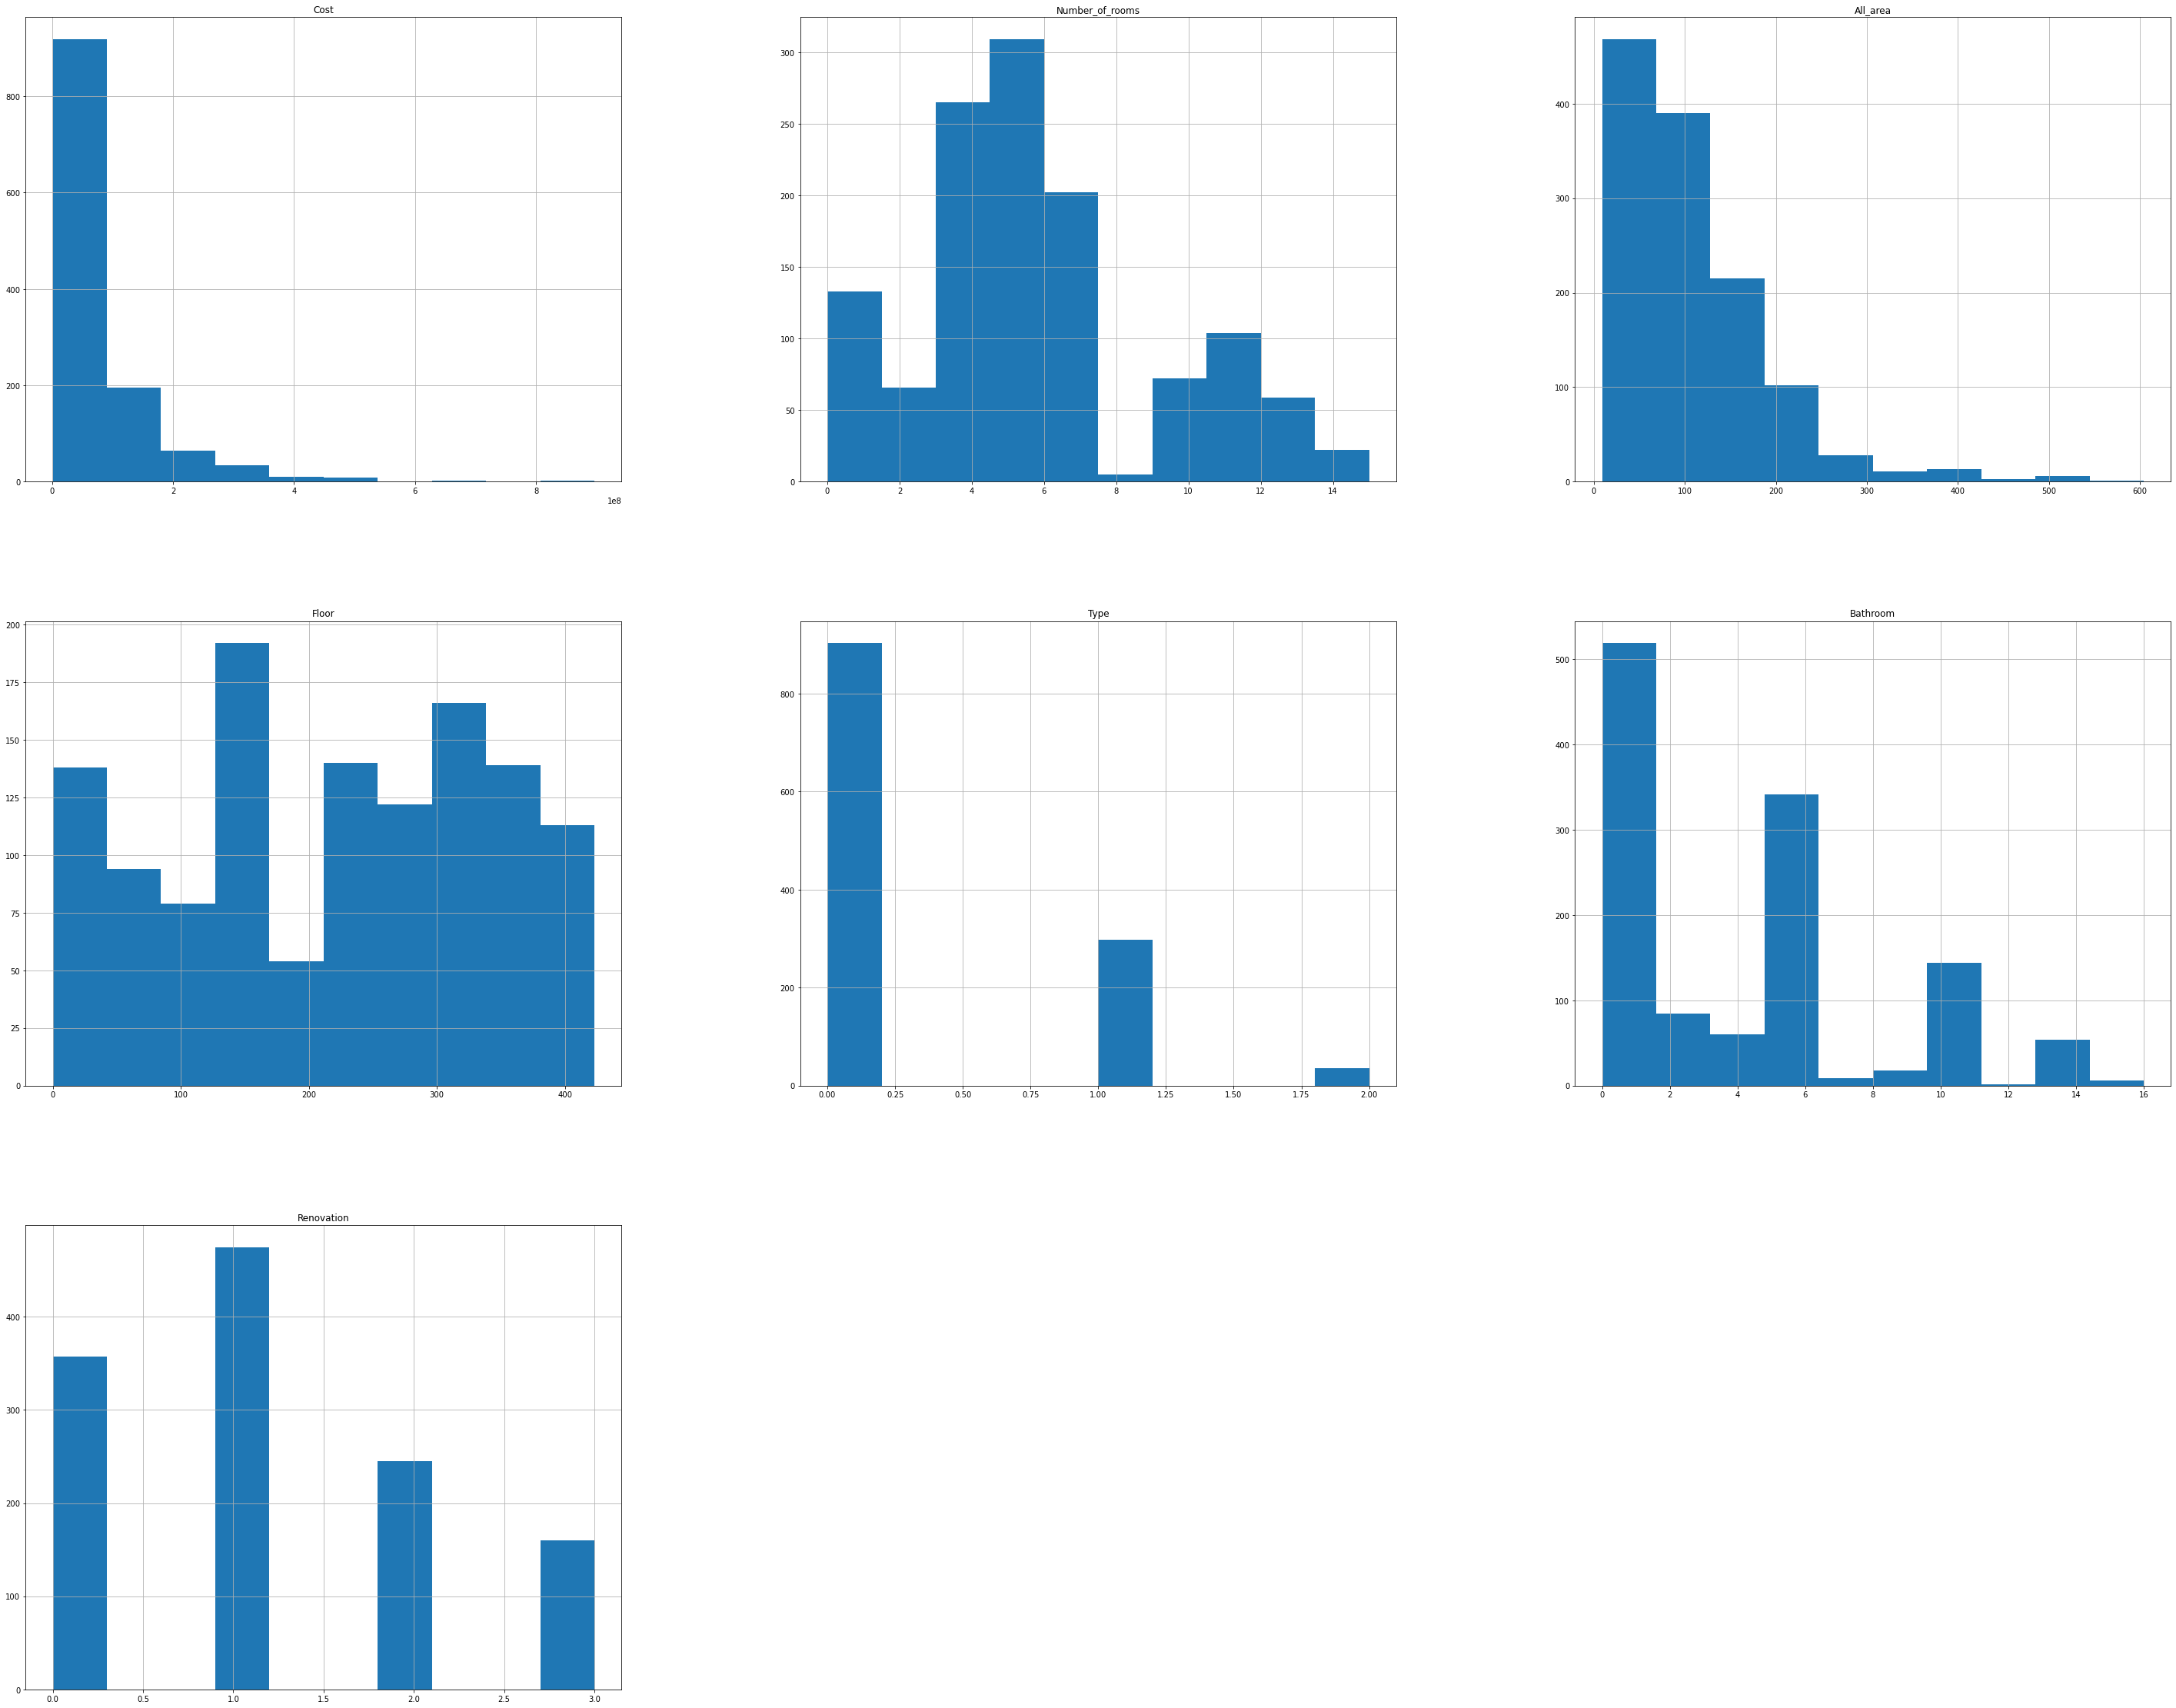

In [231]:
# визуализация данных
df.hist(figsize=(50, 40))

<AxesSubplot:xlabel='Cost'>

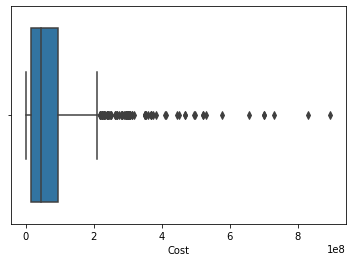

In [232]:
import seaborn as sns
sns.boxplot(x='Cost', data=df)

In [233]:
#поскольку по графикам заметна скошенность по цене - удалим квартиры стоимостью дороже 100 миллионов рублей
df[(df['Cost']>100000000)] = np.nan
df = df.dropna()

## Обучение моделей

In [234]:
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV, LassoCV
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score as r2, mean_squared_error as mse
from sklearn.linear_model import (LinearRegression, ElasticNet, BayesianRidge)
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import (train_test_split, cross_val_score)
from sklearn.metrics import (mean_squared_error, mean_absolute_error, r2_score)
from sklearn.model_selection import (train_test_split, GridSearchCV, cross_val_score)


In [236]:
X = df.drop(columns=['Cost'])
y = df['Cost']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

def learn(model, *args, **kwargs):
    model = model(*args, **kwargs)
    model.fit(X_train, y_train)
    res = {}
    res['name'] = model.__class__.__name__
    res['r2_train'] = r2(y_train, model.predict(X_train))
    res['r2_test'] = r2(y_test, model.predict(X_test))
    res['mse_train'] = mse(y_train, model.predict(X_train)) ** 0.5
    res['mse_test'] = mse(y_test, model.predict(X_test)) ** 0.5
    res['mae_train'] = mean_absolute_error(y_train, model.predict(X_train)) 
    res['mae_test'] = mean_absolute_error(y_test, model.predict(X_test)) 
    res['params'] = kwargs
    return res
def learn_multiple_models(models):
    return pd.DataFrame([learn(model) for model in models])
models = [BayesianRidge, LinearRegression, Ridge, RidgeCV, LassoCV, RandomForestRegressor, GradientBoostingRegressor]
learn_multiple_models(models)

name      r2_train   r2_test     mse_train  \
0              BayesianRidge  6.843948e-09 -0.004398  2.728004e+07   
1           LinearRegression  7.249806e-01  0.455593  1.430628e+07   
2                      Ridge  7.249804e-01  0.455624  1.430628e+07   
3                    RidgeCV  7.249673e-01  0.455855  1.430662e+07   
4                    LassoCV  7.203833e-01  0.450969  1.442536e+07   
5      RandomForestRegressor  9.654027e-01  0.722611  5.074186e+06   
6  GradientBoostingRegressor  8.626337e-01  0.732162  1.011079e+07   

       mse_test     mae_train      mae_test params  
0  2.651813e+07  2.309368e+07  2.227750e+07     {}  
1  1.952323e+07  1.039678e+07  1.103652e+07     {}  
2  1.952269e+07  1.039666e+07  1.103558e+07     {}  
3  1.951854e+07  1.039583e+07  1.102811e+07     {}  
4  1.960597e+07  1.045395e+07  1.107938e+07     {}  
5  1.393588e+07  3.362099e+06  9.541868e+06     {}  
6  1.369387e+07  6.974474e+06  9.356142e+06     {}

In [237]:
# для сглаживания выбросов и выравнивания значений ошибок проведем нормализации
from sklearn import preprocessing
scaler = preprocessing.MinMaxScaler()
names = df.columns
d = scaler.fit_transform(df)

df = pd.DataFrame(d, columns=names)

In [239]:
# повторное проведение обучения
X = df.drop(columns=['Cost'])
y = df['Cost']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
learn_multiple_models(models)

name  r2_train   r2_test  mse_train  mse_test  \
0              BayesianRidge  0.724967  0.457691   0.144511  0.196824   
1           LinearRegression  0.724981  0.455593   0.144508  0.197204   
2                      Ridge  0.718161  0.493448   0.146289  0.190225   
3                    RidgeCV  0.724875  0.461333   0.144536  0.196162   
4                    LassoCV  0.724978  0.456343   0.144509  0.197069   
5      RandomForestRegressor  0.964737  0.711664   0.051745  0.143517   
6  GradientBoostingRegressor  0.862634  0.730873   0.102129  0.138654   

   mae_train  mae_test params  
0   0.105071  0.111466     {}  
1   0.105018  0.111480     {}  
2   0.107812  0.112766     {}  
3   0.105188  0.111516     {}  
4   0.105041  0.111465     {}  
5   0.033787  0.097603     {}  
6   0.070449  0.094574     {}

## Кросс-валидация

In [240]:
model = RandomForestRegressor()
model.fit(X_train, y_train)
train_scores = cross_val_score(model, X_train, y_train, scoring='r2', cv=10)
test_scores = cross_val_score(model, X_test, y_test, scoring='r2', cv=10)

In [241]:
print('r2_train_cross_val = ' + str(np.mean(train_scores)) + ', r2_test_cross_val = ' + str(np.mean(test_scores)))

r2_train_cross_val = 0.7528471355080364, r2_test_cross_val = 0.6927902234798806


In [242]:
model = GradientBoostingRegressor()
model.fit(X_train, y_train)
train_scores = cross_val_score(model, X_train, y_train, scoring='r2', cv=10)
test_scores = cross_val_score(model, X_test, y_test, scoring='r2', cv=10)


In [243]:
print('r2_train_cross_val = ' + str(np.mean(train_scores)) + ', r2_test_cross_val = ' + str(np.mean(test_scores)))

r2_train_cross_val = 0.7598910093883445, r2_test_cross_val = 0.7095340901952304


## Поиск оптимальных гиперпараметров

In [204]:
#Для случайного леса
import numpy as np
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)
{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}
from sklearn.model_selection import RandomizedSearchCV
rf = RandomForestRegressor()
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
rf_random.fit(X_train, y_train)
rf_random.best_params_

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}
Fitting 3 folds for each of 100 candidates, totalling 300 fits


{'n_estimators': 1800,
 'min_samples_split': 2,
 'min_samples_leaf': 4,
 'max_features': 'sqrt',
 'max_depth': 90,
 'bootstrap': True}

In [205]:
%%time
#Для градиентного бустинга
parameters_gbr = { 
                 "learning_rate": np.arange(0.1, 500.1, 100.0),
                 "n_estimators" :  range(50, 100, 10),
                 "subsample": np.arange(0.1, 1.0, 0.1),
                }
gbr = GradientBoostingRegressor()
grid_gbr = GridSearchCV(gbr, parameters_gbr)
grid_gbr.fit(X_train, y_train)
grid_gbr.best_params_

C:\Users\User\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:87: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
C:\Users\User\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\User\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:571: RuntimeWarning: invalid value encountered in double_scalars
  old_oob_score - loss_(y[~sample_mask],
C:\Users\User\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\User\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:571: RuntimeWarning: invalid value encountered in double_scalars
  old_oob_score - loss_(y[~sample_mask],
C:\Users\User\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered

Wall time: 1min 28s


{'learning_rate': 0.1, 'n_estimators': 80, 'subsample': 0.6}

In [244]:
learn(RandomForestRegressor, **rf_random.best_params_)

{'name': 'RandomForestRegressor',
 'r2_train': 0.8455370160986173,
 'r2_test': 0.7375741154099347,
 'mse_train': 0.10829839957919982,
 'mse_test': 0.13691724068528205,
 'mae_train': 0.07332587843662533,
 'mae_test': 0.09462441099044998,
 'params': {'n_estimators': 1800,
  'min_samples_split': 2,
  'min_samples_leaf': 4,
  'max_features': 'sqrt',
  'max_depth': 90,
  'bootstrap': True}}

In [245]:
learn(GradientBoostingRegressor, **grid_gbr.best_params_)

{'name': 'GradientBoostingRegressor',
 'r2_train': 0.8495514881513175,
 'r2_test': 0.7454115908053711,
 'mse_train': 0.10688180432884178,
 'mse_test': 0.13485719336278187,
 'mae_train': 0.0747961313708513,
 'mae_test': 0.09264680911627259,
 'params': {'learning_rate': 0.1, 'n_estimators': 80, 'subsample': 0.6}}

## Выводы
Наилучшие показатели по выбранным моделям обучениям, согласно показателям кросс-валидации, демонстрируются по модели GradientBoostingRegressor. Согласно коэффицинту детерминации, модель нормально отображает функциональную связь данных